# Milestone 3: Data Presentation and Visualization


### Soheil Dejnabadi (PSID: 1937584)

#### Goal of Data Analysis
Our team was tasked to assist the home loan company, Dream Housing Finance company in creating an automated loan eligibility process based
on the details provided on the customer's application. The company is looking to streamline their loan eligibility process by automating it in real-time. When applicants apply for a home loan, some traits the company looks at include: Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, Loan Amount Term, and more. The goal of this automation is to identify customer segments that are eligible for specific loan amounts, allowing the company to efficiently approve or reject applications with minimal error. By automating the loan eligibility process, the company can reduce the time and resources required to assess loan applications and reallocate it to improving business within their business and with their customers.


To create this automating process, the company will need to develop a data-driven approach that takes into account a range of factors, such as credit risk, affordability, and customer preferences. This will require the use of advanced analytics and machine learning techniques to analyze large volumes of data and identify patterns and trends that can inform loan eligibility decisions. The company has collected some consumer data onto this website, Kaggle: Home Loan Approval Dataset, with their corresponding approval status which our team will use to create the machine learning model.

To begin building the model, first, we want to know the dataset through data visualization (seeing what raw data looks like) and clean the dataset
of outliers (data points that will skew our model), categorical variables, and unimportant observations. Then, we will run several machine learning
models to help us find one that best predicts the outcomes of our dataset. Each model will be trained to predict the Loan Status, which is likely to
be a binary variable, "Yes" or "No", indicating whether a loan was approved or not.

Now, we present to the Dream Housing Finance loan company our best predicting model, with visualizations and interpretations, based on the
outcomes of previous home loaning customers.

To begin, we will import our libraries and cleaned data.

In [2]:
#libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data set
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Property_Area,Loan_Status
0,1,1,1,1,0,4583,1508,128,360,0,0
1,1,1,0,1,1,3000,0,66,360,2,1
2,1,1,0,0,0,2583,2358,120,360,2,1
3,1,0,0,1,0,6000,0,141,360,2,1
4,1,1,2,1,1,5417,4196,267,360,2,1


### Visualizations & Interpretations
First, we will look at our dataset, its structures, and some patterns/correlations that occur naturally within it. First, we will explore the distribution of gender that apply for home loans.

In [4]:
loan_data['Gender'].value_counts() #number of males and females in our dataset.

1    312
0     78
Name: Gender, dtype: int64

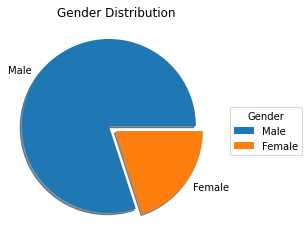

In [5]:
y= np.array([312, 78])
mylabels=["Male", "Female"]
explode=(0.1,0)

fig, ax = plt.subplots()
ax.pie(y, labels=mylabels, colors=['#1f77b4', '#ff7f0e'], explode=explode, shadow=True)

ax.set_title("Gender Distribution")
ax.legend(title="Gender", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

As we can tell from the pie chart above, more males are inclined to apply for a home loan than females. Now, we want to see the impact of home loan approval based on the applicant's gender.

   Gender  Loan_Status  Count
0       0            0     28
1       0            1     50
2       1            0     76
3       1            1    236


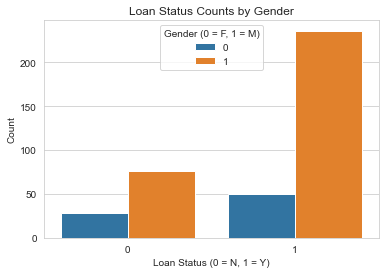

In [7]:
sns.set_style('whitegrid')
sns.countplot(x=loan_data['Loan_Status'], hue='Gender', data=loan_data)
value_counts = loan_data.groupby(['Gender', 'Loan_Status']).size().reset_index(name='Count')
print(value_counts)

plt.title('Loan Status Counts by Gender')
plt.xlabel('Loan Status (0 = N, 1 = Y)')
plt.ylabel('Count')
plt.legend(title='Gender (0 = F, 1 = M)', loc='upper center')

plt.show()

As we can see from the bar graph, men are overwhelmingly more likely to be approved for a home loan status than females. In fact, out of 78
females, only 28 get a home loan approved, a 35.9% approval rate. In opposition, out of 312 males, 236 home loans are approved, which is a 75.6%
approval rate. Looking at additional qualities of applicants we will come to understand why that is.

Looking at the correlation map below, we can see how important/unimportant certain qualities that the company collects is in determining the
home loan status. If it is unimportant according to our map, then we can decide to no longer ask the customer for that information and disregard it
as we are building our predicting model. 

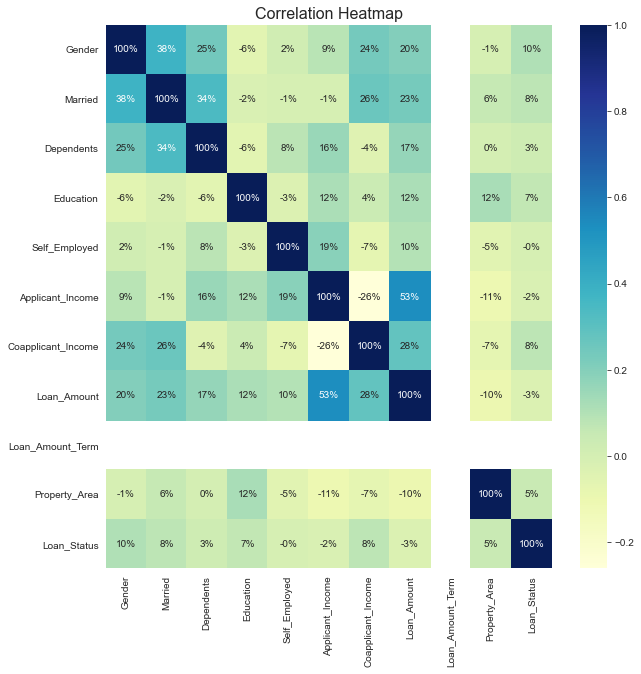

In [8]:
plt.figure(figsize=(10,10))

sns.heatmap(loan_data.corr(), annot=True, cmap='YlGnBu', fmt='.0%')
plt.title('Correlation Heatmap', fontsize=16)

plt.show()

In [9]:
loan_data['Loan_Amount_Term'].nunique()

1

If all the values in a feature (column) of a dataset are the same, it may not provide much useful information for analysis or modeling. In this case, it may be better to drop the feature from the dataset. Thus, we will consider dropping the Loan_Amount_Term variable, as it did not contribute to our dataset's pattern.


Now, we will take a final look at how our dataset is distributed in terms of each applicant characteristic. Using this information, we can come to
understand how reasonable our predicting model is to the average applicant's characteristics as we build in the next phase.

In [11]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

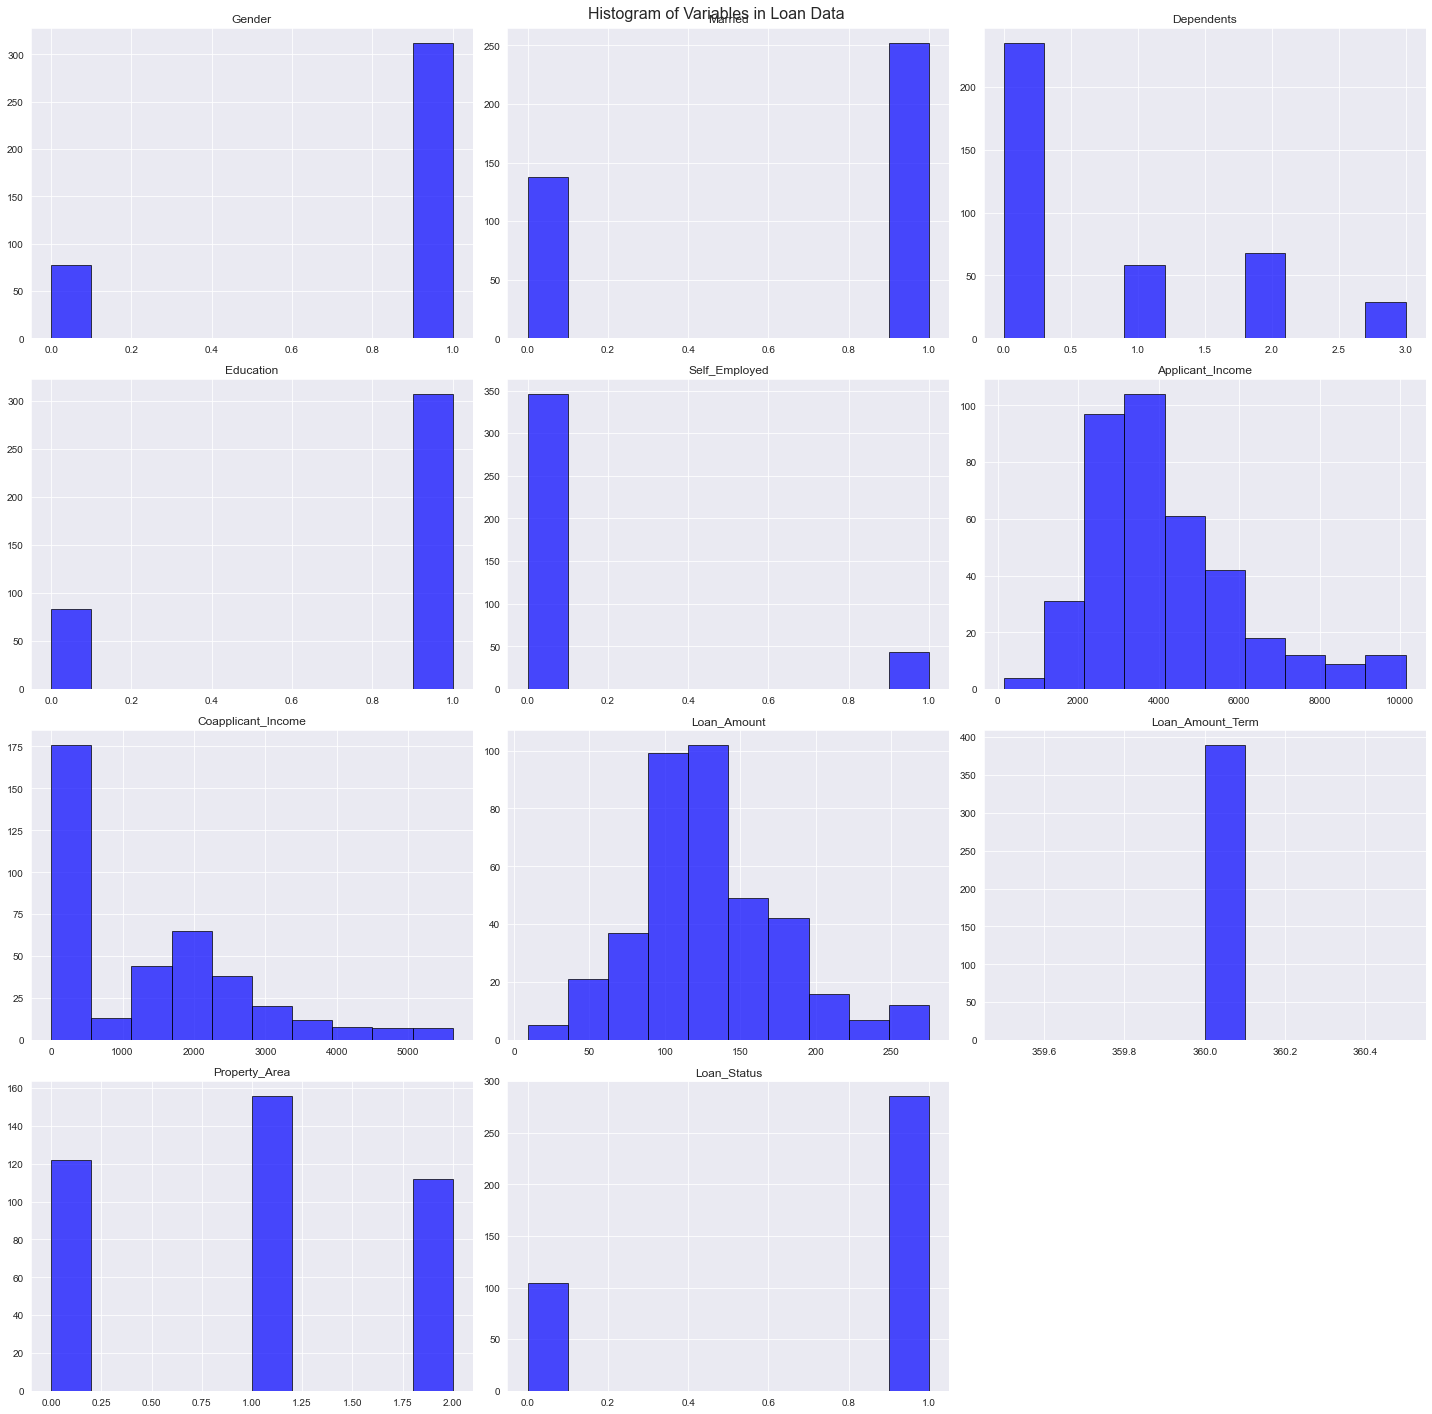

In [12]:
loan_data.hist(figsize=(20, 20), color='blue', alpha=0.7, edgecolor='black')

plt.xlabel('Variable', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.suptitle('Histogram of Variables in Loan Data', fontsize=16)
plt.tight_layout()

plt.show()

#### Machine Learning Model
Now, we will begin creating our predicting model. We first prepare our model for training by scaling/normalizing each customer's feature to make
sure one feature is not outweighing another. Then, we will ensure that this scaling has not impacted our data's natural structure by comparing the
approval counts to the original.


In [14]:
from sklearn.preprocessing import StandardScaler

# all columns except 'Loan_Status'
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']

# create our scaler object
scaler = StandardScaler()

# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)

# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

X.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Property_Area
0,0.5,0.740013,0.280013,0.519960,-0.356606,0.244227,0.142688,-0.045721,0.0,-1.258582
1,0.5,0.740013,-0.721869,0.519960,2.804218,-0.592455,-0.922057,-1.337233,0.0,1.324823
2,0.5,0.740013,-0.721869,-1.923225,-0.356606,-0.812857,0.742843,-0.212368,0.0,1.324823
3,0.5,-1.351328,-0.721869,0.519960,-0.356606,0.993171,-0.922057,0.225080,0.0,1.324823
4,0.5,0.740013,1.281896,0.519960,2.804218,0.685031,2.040590,2.849766,0.0,1.324823


1    286
0    104
Name: Loan_Status, dtype: int64


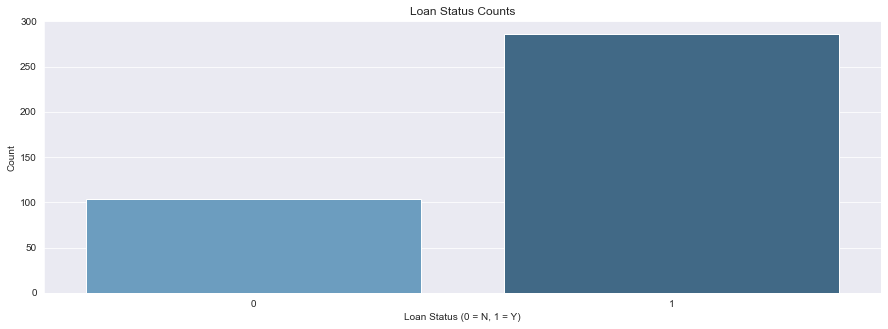

In [15]:
sns.countplot(x=loan_data['Loan_Status'], palette='Blues_d') #looking at loan approval status post-normalizing

plt.xlabel('Loan Status (0 = N, 1 = Y)')
plt.ylabel('Count')
plt.title('Loan Status Counts')

value_counts = loan_data['Loan_Status'].value_counts()

print(value_counts)

plt.show()

The above graph shows that there are 286 observations in the Loan_Status column that have a value of 1 (approved loans) and 104 observations
that have a value of 0 (rejected loans). Based on this information, we can say that the data is indeed biased towards approved loans, as there are
more observations with a value of 1 than with a value of 0.


This is where an additional parameter stratify can come in handy. Stratified sampling is a sampling technique that aims to split a dataset in a way
that each split is similar with respect to a certain characteristic or feature. In a classification setting, this characteristic is often the target variable or
the class label. The goal of stratified sampling is to ensure that the train and test sets have approximately the same percentage of samples of each
target class as the complete set. This is important because if the train and test sets are not representative of the complete set, the resulting model
may be biased towards certain classes and may not generalize well to new data.


By using stratified sampling, we can ensure that the train and test sets are representative of the complete set and that the resulting model is more
likely to generalize well to new data. (Generally a test size of around 0.3 is good enough.) We will build our model using a KNN approach, which
tries to predict outcomes by looking at an observation's k number of neighbors (where k is a natural number).

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-30 
for i in range(1,31):
     # create a model with k=i
     knn = KNeighborsClassifier(i)
     # train the model
     knn.fit(X_train,y_train)
    
     # append scores. 
     train_scores.append(knn.score(X_train,y_train))
     test_scores.append(knn.score(X_test,y_test))

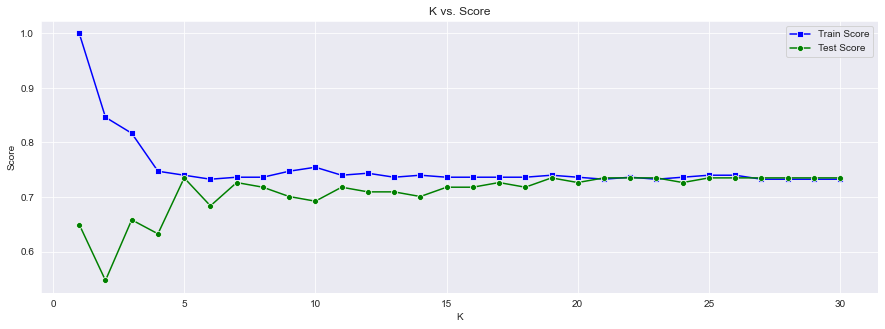

<Figure size 720x432 with 0 Axes>

In [18]:
sns.lineplot(x=range(1, 31), y=train_scores, marker='s', color='blue', label='Train Score')
sns.lineplot(x=range(1, 31), y=test_scores, marker='o', color='green', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()

plt.figure(figsize=(10, 6))
plt.show()

From the graph above, best result seems to be captured at k greater than or equal to 17. We now test a variety of these k-values that fall into this
range to find the prediction of the next data point. We will choose the k-value that yields the highest accuracy score for our predicting model.


In [19]:
# Define a list of k values to try
k_values = [17, 19, 21, 23, 27, 28, 29, 30]

# Loop over the k values and fit the model for each value
for k in k_values:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train, y_train)
     score = knn.score(X_test, y_test)
     print(f"k={k}, score={score}")

k=17, score=0.7264957264957265
k=19, score=0.7350427350427351
k=21, score=0.7350427350427351
k=23, score=0.7350427350427351
k=27, score=0.7350427350427351
k=28, score=0.7350427350427351
k=29, score=0.7350427350427351
k=30, score=0.7350427350427351


Out of all of the values we tested, we will choose k=17 because it yields the best accuracy result, without being biased to the dataset predictions(called overfitting). Thus, when we create our final, best-performing model:

In [20]:
#let's use the best hyperparameters: 
best_knn = KNeighborsClassifier(n_neighbors = 17, weights = 'distance',
     metric = 'minkowski')
best_knn.fit(X_train, y_train)

best_y_hat = best_knn.predict(X_train)
best_y = best_knn.predict(X_test)

#final results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, best_y)
print('Confusion matrix\n\n', conf_mat)
print('\nTrue Positives(TP) = ', conf_mat[0,0])
print('\nTrue Negatives(TN) = ', conf_mat[1,1])
print('\nFalse Positives(FP) = ', conf_mat[0,1])
print('\nFalse Negatives(FN) = ', conf_mat[1,0])

print(classification_report(y_test,best_y))

Confusion matrix

 [[ 1 30]
 [ 4 82]]

True Positives(TP) =  1

True Negatives(TN) =  82

False Positives(FP) =  30

False Negatives(FN) =  4
              precision    recall  f1-score   support

           0       0.20      0.03      0.06        31
           1       0.73      0.95      0.83        86

    accuracy                           0.71       117
   macro avg       0.47      0.49      0.44       117
weighted avg       0.59      0.71      0.62       117



Thus, with this machine model, the company can predict an applicant's home loan approval or rejection with a 71% accuracy score. This is a
significant accuracy and will be able to streamline productivity within the company.


#### Conclusion
As a team of data analysts for the Dream Housing Finance mortgage loan company, we have created an automated predicting system using the
KNN (K-Nearest Neighbors) model. The model has a fairly good prediction score, over 70% accuracy, to assist the company with filtering a majority
of applicants acccurately into their designated "approved" or "denied" labels based on the applicant's qualities. Though it is highly efficient, there
are some downsides since the model can only assume that the applicant is giving factual information and cannot check if the applicant is
fabricating personal information. Additionally, there certainly is a potential for error in this predicting model, so it woulf be beneficial to the
company to have a "disputing" option, where applicants can personally speak to a loan agent to discuss a loan according to their unique
circumstances. Moreover, this personal care for clients with more "unusual" circumstances could build a personable reputation for the company in
customer service. We foresee that this model will help the company optimize its functions in various ways, such as:

1. Loan approval prediction: You can use the KNN model to predict whether a loan application is likely to be approved or not based on various
features such as credit history, income, loan amount, and property area. This can help the company to make more informed decisions about
loan approvals and manage risk more effectively. Additionally, loan agents are spending less time approving or denying "obvious" cases and
are able to mitgate that time to more productive company or client work.


2. Customer segmentation: You can use the KNN model to segment customers into different groups based on their loan history, credit score, and
other characteristics. This can help the company to tailor its marketing and sales strategies to different customer segments and improve
customer engagement.


3. Anomaly detection: You can use the KNN model to detect anomalies or outliers in the loan data, such as fraudulent applications or unusual
loan amounts. This can help the company to identify potential issues and take appropriate action to mitigate risk.


4. Loan portfolio optimization: You can use the KNN model to optimize the company's loan portfolio by analyzing the performance of different
loan products and identifying opportunities for improvement. This can help the company to increase profitability and reduce risk.

5. Customer retention: You can use the KNN model to build a recommender system that suggests loan products or services to customers based
on their past behavior or preferences. This can help the company to increase customer retention and loyalty.


Overall, this KNN model can be a powerful tool for the Dream Housing Finance mortgage loan company make better decisions and optimize their
operations. Using the model's powerful capabilities to recognize patterns and correlations in the collected applicant dataset, the company now has
valuable insights and recommendations that can drive business success.